In [1]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

def bak_sneppen_1D(n_iterations, skip_iterations, n_species, local_segment=[0,0]):
    # Initialize the system
    fitness = np.random.rand(n_species)
    threshold = 0.6
    gap_function_value = 0
    min_fitness = np.zeros(n_iterations - skip_iterations)
    fitness_history = []
    avalanche_sizes_local = []
    avalanche_sizes_global = []
    avalanche_activity_local = []
    avalanche_activity_global = []
    avalanche = False
    avalanche_size_local = 0
    avalanche_size_global = 0

    for i in range(n_iterations):
        # species with minimum fitness value
        min_index = np.argmin(fitness)

        # assign a new random fitness value to the selected species
        fitness[min_index] = np.random.rand()

        # check neighbors and update their fitness if below the threshold
        if min_index >= 0:
            fitness[min_index - 1] = np.random.rand()
        if min_index < n_species - 1:
            fitness[min_index + 1] = np.random.rand()
        # periodic boundary
        elif min_index == n_species -1:
            fitness[0] = np.random.rand()

        min_fitness_value = np.min(fitness)
        # if min_fitness_value > gap_function_value:
        #     gap_function_value = min_fitness_value
        #     # print(f'{gap_function_value}, iteration: {i}')
        #     threshold = gap_function_value - 0.01
        
        # skip iterations to start at the critical state
        if i >= skip_iterations:
            fitness_history.append(fitness)
            

            # save minimum fitness for each iteration
            min_fitness[i - skip_iterations] = min_fitness_value

            # if avalanche in progress
            if min_fitness_value < threshold and avalanche == True:
                # seperate counter for local activity
                if min_index >= local_segment[0] and min_index < local_segment[1]:
                    avalanche_size_local += 1
                    avalanche_activity_local.append(i-skip_iterations)

                avalanche_size_global += 1
                avalanche_activity_global.append(i-skip_iterations)

            # start of new avalanche
            if min_fitness_value < threshold and avalanche == False:
                # print(f'avalanche start i: {i}')
                # avalanche_size += 1
                avalanche = True

            # end of an avalanche
            if min_fitness_value >= threshold and avalanche == True:
                # print(f'avalanche end i: {i}')

                avalanche_sizes_local.append(avalanche_size_local)
                avalanche_sizes_global.append(avalanche_size_global)
                avalanche_size_local = 0
                avalanche_size_global = 0
                avalanche = False


    return min_fitness, fitness_history, avalanche_sizes_global, avalanche_sizes_local, avalanche_activity_global, avalanche_activity_local



In [2]:
# Run the Bak-Sneppen simulation
n_iterations = 10000000
skip_iterations = 200000
local_segment = [20,220]
n_species = 1000
avalanche_sizes_local = [0,0]

counter = 0
while sum(x != 0 for x in avalanche_sizes_local) < 50:
    counter += 1
    print(f'{counter}, {sum(x != 0 for x in avalanche_sizes_local)}', end='\r')
    min_fitness, fitness_history, avalanche_sizes_global, avalanche_sizes_local, avalanche_activity_global, avalanche_activity_local = bak_sneppen_1D(n_iterations, skip_iterations, n_species, local_segment)


6929


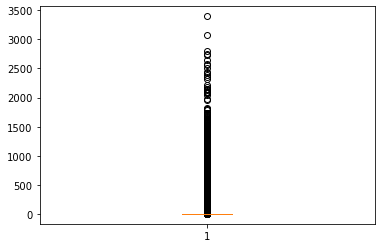

In [3]:
print(sum(x != 0 for x in avalanche_sizes_local))
plt.boxplot(avalanche_sizes_local)
plt.show()

Local avalanche activity

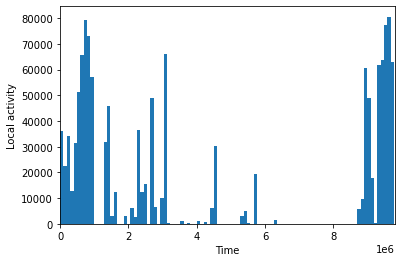

In [4]:
# plot avalanche activity in time
plt.hist(avalanche_activity_local, bins=100)
plt.xlim(0,n_iterations-skip_iterations)
plt.xlabel('Time')
plt.ylabel('Local activity')
plt.show()

Avalanche size distribution

[0.022079244969233327, 0.008816314651588227, 0.005945451521702977, 0.0045962913687011475, 0.0036878430068185597, 0.0030371694661566603, 0.0026816896723765174, 0.002546565774155995, 0.002180691834358889, 0.0020393314485281887, 0.001802344919341427, 0.0016547480459005487, 0.0015341759521037752, 0.0014614169299850324, 0.001376184932645934, 0.001261849326459338, 0.0012410610344254116, 0.0010768335273573923, 0.0011288042574422086, 0.001037335772492932, 0.0009479461167470481, 0.0009063695326791951, 0.0008606352902045568, 0.0008232163645434891, 0.0007733244636620656, 0.0007130384167636786, 0.0007483785132213537, 0.0007317478795942126, 0.0006964077831365375, 0.0005467320804922668, 0.0006278064194245801, 0.0005529685681024447, 0.000640279394644936, 0.0005488109096956593, 0.0004594212539497755, 0.000480209545983702, 0.00048644603359387987, 0.0004822883751870946, 0.00045318476633959755, 0.0004178446698819225, 0.0004573424247463828, 0.0004074505238649593, 0.00040121403625478135, 0.0003991352070513

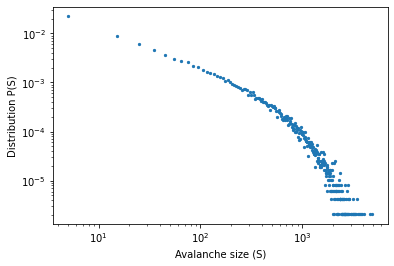

In [5]:
# bins of avalanche sizes
bins = [x for x in np.arange(0,np.max(avalanche_sizes_global),10)]
all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_global) - 10,10)]
avalanche_size_distribution, _ = np.histogram(avalanche_sizes_global, bins, density=True)

# remove bins were value is zero
avalanche_size_distribution_plot = []
bins_plot = []
for i in range(len(avalanche_size_distribution)):
    if avalanche_size_distribution[i] != 0:
        avalanche_size_distribution_plot.append(avalanche_size_distribution[i])
        bins_plot.append(all_bins[i])




print(avalanche_size_distribution_plot)
print(bins_plot)
print(len(avalanche_sizes_global))


plt.scatter(bins_plot, avalanche_size_distribution_plot, s=5)
# plt.hist(avalanche_sizes_global, bins=100)
plt.xlabel('Avalanche size (S)')
plt.ylabel('Distribution P(S)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [6]:
# run simulation for different system sizes to compare
system_sizes = [32, 128, 512, 2048]
n_iterations = 10000000
skip_iterations = 200000

avalanche_sizes_list = []

for n_species in system_sizes:
    min_fitness, fitness_history, avalanche_sizes_global, avalanche_sizes_local, avalanche_activity_global, avalanche_activity_local = bak_sneppen_1D(n_iterations, skip_iterations, n_species, local_segment)
    avalanche_sizes_list.append(avalanche_sizes_global)


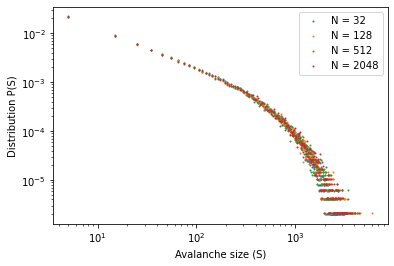

In [7]:
system_sizes = [32, 128, 512, 2048]

for i in range(len(avalanche_sizes_list)):
    # bins of avalanche sizes
    bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[i]),10)]
    all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[i]) - 10,10)]
    avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[i], bins, density=True)

    # remove bins were value is zero
    avalanche_size_distribution_plot = []
    bins_plot = []
    for j in range(len(avalanche_size_distribution)):
        if avalanche_size_distribution[j] != 0:
            avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
            bins_plot.append(all_bins[j])


    # print(avalanche_size_distribution_plot)
    # print(bins_plot)
    # print(len(avalanche_sizes_global))
    

    plt.scatter(bins_plot, avalanche_size_distribution_plot, label=f'N = {system_sizes[i]}', s=1)
    plt.xlabel('Avalanche size (S)')
    plt.ylabel('Distribution P(S)')
    plt.xscale('log')
    plt.yscale('log')
plt.legend()
plt.show()

Power law with exponential decay fit

/var/folders/q3/3hqw9q9j4vd94qrdvnf06ghw0000gn/T/ipykernel_19159/126381611.py:20: RuntimeWarning: overflow encountered in exp
  return A * np.power(x, -alpha) * np.exp(-lam * x)


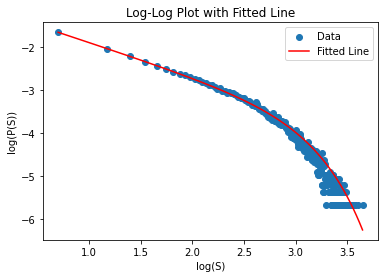

Exponent: 0.7915562767065303
A: 0.07876045259076653
Lambda: 0.0011686686710667572


In [16]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[3]),10)]
all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[3]) - 10,10)]
avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[3], bins, density=True)

# remove bins were value is zero
avalanche_size_distribution_plot = []
bins_plot = []
for j in range(len(avalanche_size_distribution)):
    if avalanche_size_distribution[j] != 0:
        avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
        bins_plot.append(all_bins[j])


# Define the combined power-law and exponential decay function
def combined_function(x, A, alpha, lam):
    return A * np.power(x, -alpha) * np.exp(-lam * x)


# Fit the data to the combined function
popt, pcov = curve_fit(combined_function, bins_plot, avalanche_size_distribution_plot)

# Retrieve the optimized parameters
A_fit, alpha_fit, lam_fit = popt

# Take the logarithm of the filtered data
log_bins = np.log10(bins_plot)
log_sizes = np.log10(avalanche_size_distribution_plot)


exponent = alpha_fit

fit_x = np.linspace(min(log_bins), max(log_bins), 100)
fit_y = combined_function(10 ** fit_x, A_fit, alpha_fit, lam_fit)
fit_y = np.log10(fit_y)

# Plot the log-log data and the fitted line
plt.scatter(log_bins, log_sizes, label='Data')
plt.plot(fit_x, fit_y, 'r-', label='Fitted Line')
plt.xlabel('log(S)')
plt.ylabel('log(P(S))')
plt.title('Log-Log Plot with Fitted Line')
plt.legend()
plt.show()

# Print the exponent of the fitted line
print("Exponent:", exponent)
print("A:", A_fit)
print("Lambda:", lam_fit)



297
297
70
70


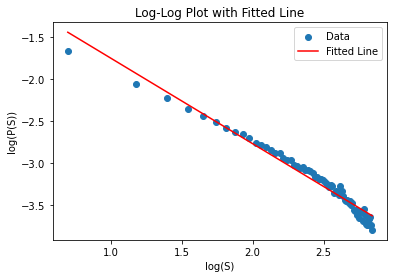

Exponent: -1.021611355814599


In [17]:
import numpy as np
import matplotlib.pyplot as plt

bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[3]),10)]
all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[3]) - 10,10)]
avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[3], bins, density=True)

# remove bins were value is zero
avalanche_size_distribution_plot = []
bins_plot = []
for j in range(len(avalanche_size_distribution)):
    if avalanche_size_distribution[j] != 0:
        avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
        bins_plot.append(all_bins[j])


print(len(bins_plot))
print(len(avalanche_size_distribution_plot))


threshold = 700

bins_filtered = [value1 for value1 in bins_plot if value1 <= threshold]
avalanche_sizes_global_filtered = [value2 for value1, value2 in zip(bins_filtered, avalanche_size_distribution_plot) if value1 <= threshold]

print(len(bins_filtered))
print(len(avalanche_sizes_global_filtered))


# Take the logarithm of the filtered data
log_bins = np.log10(bins_filtered)
log_sizes = np.log10(avalanche_sizes_global_filtered)

# Fit a straight line through linear regression
coefficients = np.polyfit(log_bins, log_sizes, 1)
exponent = coefficients[0]

# Generate the fitted line
fit_x = np.linspace(min(log_bins), max(log_bins), 100)
fit_y = coefficients[0] * fit_x + coefficients[1]

# Plot the log-log data and the fitted line
plt.scatter(log_bins, log_sizes, label='Data')
plt.plot(fit_x, fit_y, 'r-', label='Fitted Line')
plt.xlabel('log(S)')
plt.ylabel('log(P(S))')
plt.title('Log-Log Plot with Fitted Line')
plt.legend()
plt.show()

# Print the exponent of the fitted line
print("Exponent:", exponent)

In [22]:
import powerlaw
filtered_list = [value for value in avalanche_sizes_list[3] if value <= 300]
results = powerlaw.Fit(filtered_list)

# Print the estimated exponent and lower bound of the power law distribution
print("Estimated exponent (alpha):", results.power_law.alpha)
print("Estimated lower bound (xmin):", results.power_law.xmin)
print(f"exponent error: {results.power_law.sigma}")

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Estimated exponent (alpha): 11.688312623428207
Estimated lower bound (xmin): 248.0
exponent error: 0.25053791221971716


In [24]:
import numpy as np
import scipy.stats as stats
from scipy.stats import powerlaw

filtered_list = [value for value in avalanche_sizes_list[3] if value <= 300]
fit_params = stats.powerlaw.fit(filtered_list)
ks_statistic, p_value = stats.kstest(filtered_list, 'powerlaw', args=fit_params)
print(fit_params)
alpha = 0.05  # Significance level
print("p_value:", p_value)
if p_value > alpha:
    print("The data follows a power-law distribution.")
else:
    print("The data does not follow a power-law distribution.")

(0.7212173332081877, -33.72375110516795, 333.72375127569427)
p_value: 0.0
The data does not follow a power-law distribution.
